# Admission Numbers

- CSS/00099/022
- CSS/00072/021

In [2]:
import os, sys
import numpy as np
import pandas as pd

# Lab 2
These exercises focus on Pandas. Work through all exercises, searching for help when you need to (ie. frequently).

In [2]:
import pandas as pd

__EXERCISE 1: Pie shop__

_Objective: Create and manipulate DataFrames_
* Create a DataFrame with three columns: month, apple_pie_sales, blueberry_pie_sales
* Summarize which products sold best
* Create a new column to summarize revenues

In [3]:
# YOUR CODE HERE: create the df using the data supplied

months = ['Jan', 'Feb', 'Mar', 'Apr']
apple_pie_sales = [34, 19, 28, 45]  # Corrected the variable name
blueberry_pie_sales = [18, 6, 15, 51]  # Added the missing equals sign


df = pd.DataFrame({
    'Month': months,
    'Apple_Pie_Sales': apple_pie_sales,
    'Blueberry_Pie_Sales': blueberry_pie_sales
})


print(df)

  Month  Apple_Pie_Sales  Blueberry_Pie_Sales
0   Jan               34                   18
1   Feb               19                    6
2   Mar               28                   15
3   Apr               45                   51


In [4]:
# YOUR CODE HERE: calculate total sales of apple pies and total sales of blueberry pies

total_apple_pie_sales = df['Apple_Pie_Sales'].sum()


total_blueberry_pie_sales = df['Blueberry_Pie_Sales'].sum()


print(f"Total Apple Pie Sales: {total_apple_pie_sales}")
print(f"Total Blueberry Pie Sales: {total_blueberry_pie_sales}")

Total Apple Pie Sales: 126
Total Blueberry Pie Sales: 90


In [6]:
# YOUR CODE HERE: create a new columns entitled apple_pie_revenue and blueberry_pie_revenue

# Hint: revenue = units sold * price. Use the prices below.

apple_pie_price = 12
blueberry_pie_price = 15

df['Apple_Pie_Revenue'] = df['Apple_Pie_Sales'] * apple_pie_price
df['Blueberry_Pie_Revenue'] = df['Blueberry_Pie_Sales'] * blueberry_pie_price


print(df)

  Month  Apple_Pie_Sales  Blueberry_Pie_Sales  Apple_Pie_Revenue  \
0   Jan               34                   18                408   
1   Feb               19                    6                228   
2   Mar               28                   15                336   
3   Apr               45                   51                540   

   Blueberry_Pie_Revenue  
0                    270  
1                     90  
2                    225  
3                    765  


<Axes: title={'center': 'Pie Sales by Month'}, xlabel='Month'>

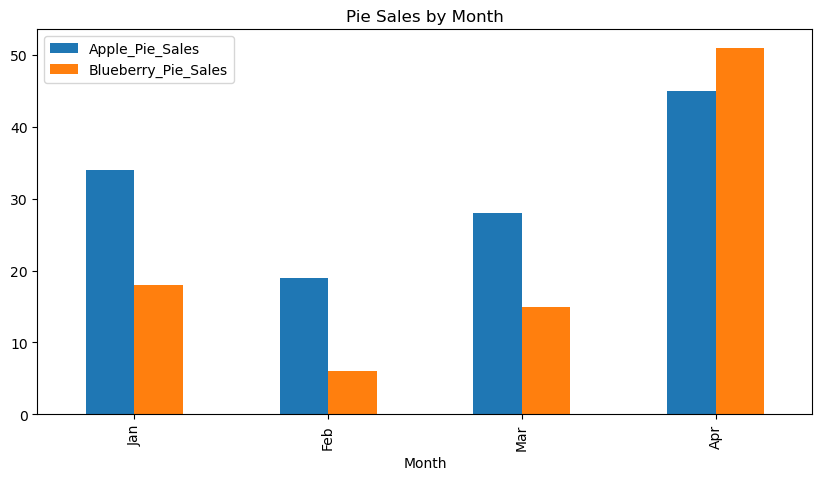

In [11]:
# BONUS: find a way to plot bar charts and pie charts (ha) of the shop's sales

# Bar chart for sales by month using pandas
df.plot(x='Month', y=['Apple_Pie_Sales', 'Blueberry_Pie_Sales'], kind='bar', stacked=False, figsize=(10, 5), title='Pie Sales by Month')


<Axes: title={'center': 'Total Pie Sales Distribution'}>

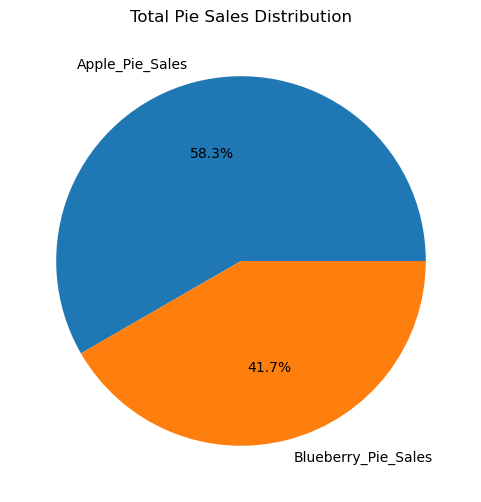

In [12]:

# Pie chart for total sales
total_sales = df[['Apple_Pie_Sales', 'Blueberry_Pie_Sales']].sum()
total_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Total Pie Sales Distribution', ylabel='')

__EXERCISE 2: NYC housing__

_Objective: clean and manipulate a real-world dataset_

We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [14]:
url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/Spring%202019%208-week%20course/week%203/pluto_shorter.csv'
df = pd.read_csv(url)

/tmp/ipykernel_5640/2261435505.py:2: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


__Step 1: Inspect and prepare the dataset__

In [15]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [17]:
# We'll select some columns to keep
df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [16]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

In [17]:
# Cleaner now, right?
df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,7.0,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,1.0,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,1.0,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,2.0,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,1.0,11421.0,29020.0,1021269.0,190793.0


In [18]:
# Here is the key that translates NYC's land use codes into plain English (p. 17 of the data dictionary)
# We'll use the df.map() method to replace the numbers with text we can understand

# BONUS POINTS: repeat this step to substitute the short borough names (eg. MN) with the actual
# full borough names (eg. MN becomes Manhattan).

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}

df['landuse'] = df['landuse'].map(land_use_dict)

In [21]:
# Cleaner now, right? Add any more data cleaning steps of your choice.

df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,Transportation & Utility,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,One & Two Family Buildings,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,One & Two Family Buildings,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,Multi-Family Walk-Up Buildings,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,One & Two Family Buildings,11421.0,29020.0,1021269.0,190793.0


__Step 2: Summarize data using mean(), min/max(), describe() etc.__
* Find out the average price of a building in Manhattan (MN) compared with Queens (QN)
* What was the most expensive building built in the year you were born?
* Compare average building

BONUS: find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings in Manhattan and Queens with those characteristics.

In [21]:
# YOUR CODE HERE:
# Filter data for Manhattan and Queens
manhattan_buildings = df[df['borough'] == 'MN']
queens_buildings = df[df['borough'] == 'QN']

# Calculate the average price (assuming 'assesstot' represents the price)
manhattan_avg_price = manhattan_buildings['assesstot'].mean()
queens_avg_price = queens_buildings['assesstot'].mean()

print("Average price in Manhattan:", manhattan_avg_price)
print("Average price in Queens:", queens_avg_price)


Average price in Manhattan: 5361806.129417164
Average price in Queens: 161665.81471389646


In [22]:
# Replace 'your_birth_year' with the actual year of birth
birth_year = 1990  # Replace this with your birth year
buildings_in_birth_year = df[df['yearbuilt'] == birth_year]

# Find the most expensive building based on 'assesstot' column
most_expensive_building = buildings_in_birth_year.loc[buildings_in_birth_year['assesstot'].idxmax()]
print("Most expensive building in the year", birth_year, ":", most_expensive_building)


Most expensive building in the year 1990 : borough                                 MN
numfloors                             38.0
yearbuilt                           1990.0
landuse      Commercial & Office Buildings
zipcode                            10017.0
assesstot                      256409100.0
xcoord                                 NaN
ycoord                                 NaN
Name: 486, dtype: object


In [23]:
# Group by borough and calculate the mean of the 'assesstot' column
avg_prices_by_borough = df.groupby('borough')['assesstot'].mean()

print("Average prices by borough:")
print(avg_prices_by_borough)


Average prices by borough:
borough
BK    2.113549e+05
BX    2.535529e+05
MN    5.361806e+06
QN    1.616658e+05
SI    8.228925e+04
Name: assesstot, dtype: float64


__Step 3: Exploratory visualization using Pandas plotting__

In [12]:
# Try using the function pandas.Series.value_counts
# It returns the unique count of values in a column
# BONUS: Could you produce this output only for Brooklyn?

df.landuse.value_counts()

One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: landuse, dtype: int64

__YOUR ACTION__: Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you about New York City's buildings by plotting charts, for example:
* How does price vary with age? (scatter of age vs. price)
* Does the breakdown of building types differ between boroughs? (pie chart of landuse)
* Which zip codes have most and fewest buildings?
* Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)


/tmp/ipykernel_5640/3226990868.py:7: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


<Axes: title={'center': 'Age of Buildings vs. Price'}, xlabel='age', ylabel='assesstot'>

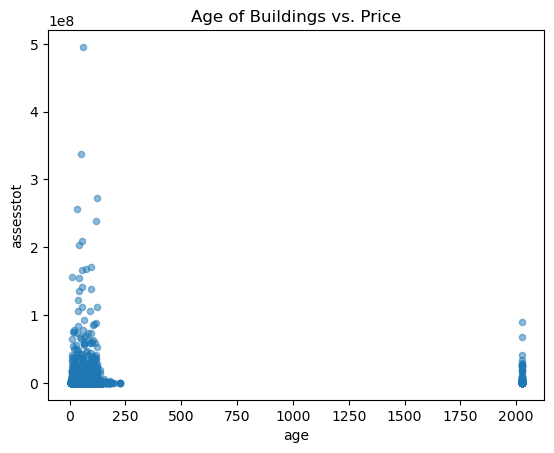

In [25]:
# YOUR CODE HERE:
import pandas as pd
import datetime

# Load the dataset
url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/Spring%202019%208-week%20course/week%203/pluto_shorter.csv'
df = pd.read_csv(url)

# Calculate the age of the buildings
current_year = datetime.datetime.now().year
df['age'] = current_year - df['yearbuilt']

# Scatter plot of age vs. price
df.plot.scatter(x='age', y='assesstot', alpha=0.5, title='Age of Buildings vs. Price')


<Axes: title={'center': 'Breakdown of Building Types (Land Use)'}, ylabel='count'>

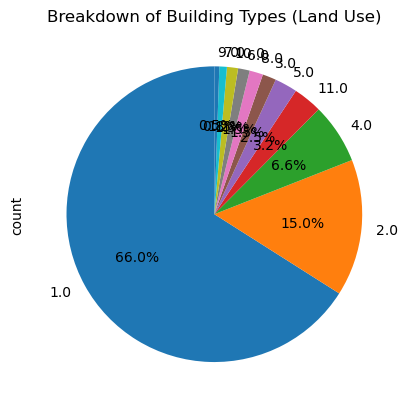

In [26]:
# Create a pie chart for the breakdown of land use types
landuse_counts = df['landuse'].value_counts()
landuse_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Breakdown of Building Types (Land Use)')


<Axes: title={'center': 'Top 10 Zip Codes with Most Buildings'}, xlabel='zipcode'>

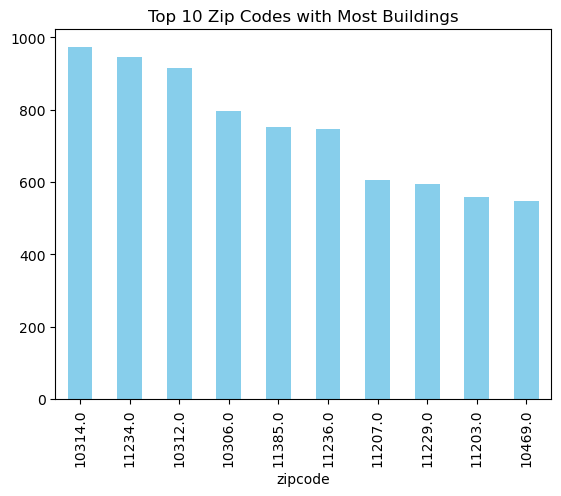

In [27]:
# Count the number of buildings per zip code
zip_counts = df['zipcode'].value_counts()

# Plotting the top 10 zip codes with the most buildings
zip_counts.head(10).plot(kind='bar', title='Top 10 Zip Codes with Most Buildings', color='skyblue')


<Axes: title={'center': 'Geographical Distribution of Buildings in NYC'}, xlabel='xcoord', ylabel='ycoord'>

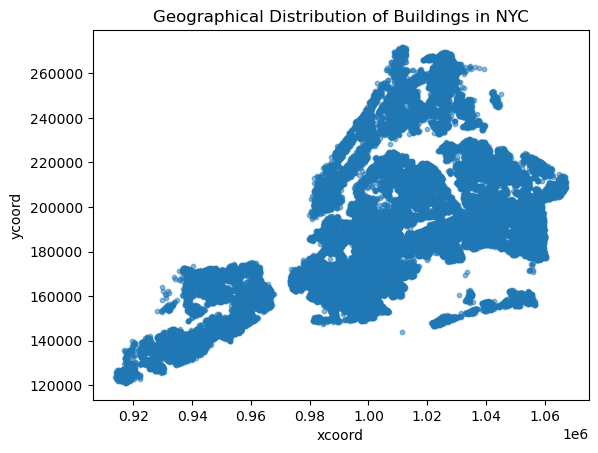

In [28]:
# Scatter plot of building locations based on coordinates
df.plot.scatter(x='xcoord', y='ycoord', alpha=0.5, s=10, title='Geographical Distribution of Buildings in NYC')


#### BONUS ADVANCED QUESTION!
Impute missing values for year_built using a custom strategy:
* Replace all NaNs with the mean year_built for buildings of the same `landuse`.
* More advanced version: replace all NaNs with mean `year_built` for buildings of the same `landuse` in the same borough. (eg. multi-family buildings in Brooklyn)

In [22]:
df.isnull().sum()

borough         0
numfloors      30
yearbuilt      20
landuse       134
zipcode      1050
assesstot      20
xcoord         52
ycoord         52
dtype: int64